# Digital Image Processing Exercise 5_2

Dr. Rahmati

By: Gholamreza Dar

Summer 2022

## Imports

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import cv2


## Functions

In [5]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

## Loading Images

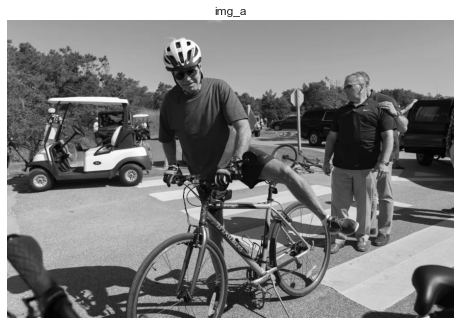

In [23]:
img_a = gray(rgb(cv2.imread('inputs/P2/biden_fall_1.png'))).astype(np.float32)
img_b = gray(rgb(cv2.imread('inputs/P2/biden_fall_2.png'))).astype(np.float32)
img_c = gray(rgb(cv2.imread('inputs/P2/biden_fall_3.png'))).astype(np.float32)

disp(img_a, 'img_a')

## A) 2nd Derivative - Dilation/Erosion

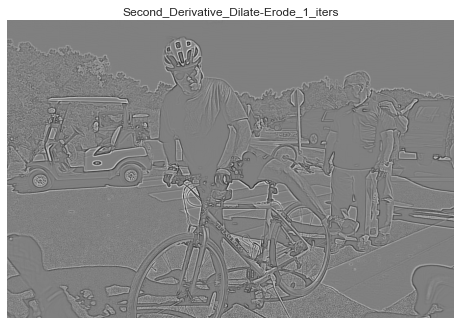

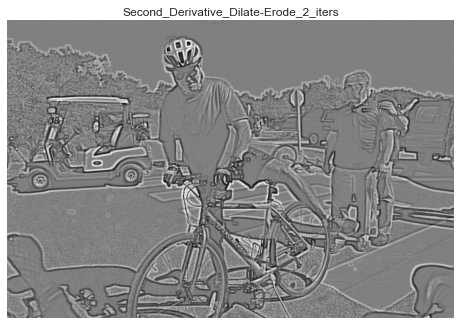

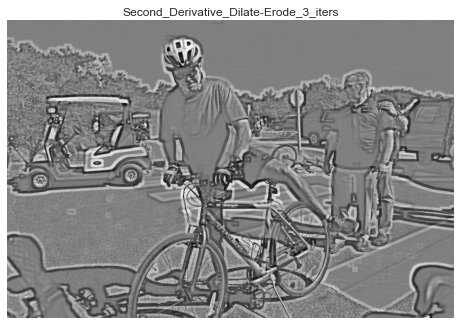

In [41]:
def second_derivative_1(img,KERNEL_SIZE=5, ITERS=1, METHOD_NAME=""):
    img_dilate = cv2.morphologyEx(img, cv2.MORPH_DILATE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_erode = cv2.morphologyEx(img, cv2.MORPH_ERODE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    
    img_second_derivative = img - ((img_dilate + img_erode) * 0.5)

    disp(img_second_derivative, f"{METHOD_NAME}_{ITERS}_iters")
    cv2.imwrite(f'outputs/P2/image_b_{METHOD_NAME}_{ITERS}_iters.png', img_second_derivative)

second_derivative_1(img_a, KERNEL_SIZE=5, ITERS=1, METHOD_NAME='Second_Derivative_Dilate-Erode')
second_derivative_1(img_a, KERNEL_SIZE=5, ITERS=2, METHOD_NAME='Second_Derivative_Dilate-Erode')
second_derivative_1(img_a, KERNEL_SIZE=5, ITERS=3, METHOD_NAME='Second_Derivative_Dilate-Erode')

## B) 2nd Derivative - Opening/Closing

In [ ]:
def second_derivative_2(img,KERNEL_SIZE=5, ITERS=1, METHOD_NAME=""):
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    
    img_second_derivative = img - ((img_close + img_open) * 0.5)

    disp(img_second_derivative, f"{METHOD_NAME}_{ITERS}_iters")
    cv2.imwrite(f'outputs/P2/image_b_{METHOD_NAME}_{ITERS}_iters.png', img_second_derivative)

second_derivative_2(img_a, KERNEL_SIZE=5, ITERS=1, METHOD_NAME='Second_Derivative_Open-Close')
second_derivative_2(img_a, KERNEL_SIZE=5, ITERS=2, METHOD_NAME='Second_Derivative_Open-Close')
second_derivative_2(img_a, KERNEL_SIZE=5, ITERS=3, METHOD_NAME='Second_Derivative_Open-Close')

## C) 2nd Derivative - ALL

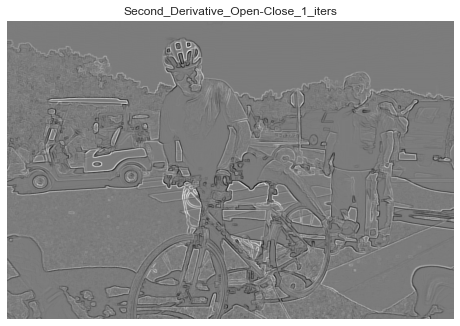

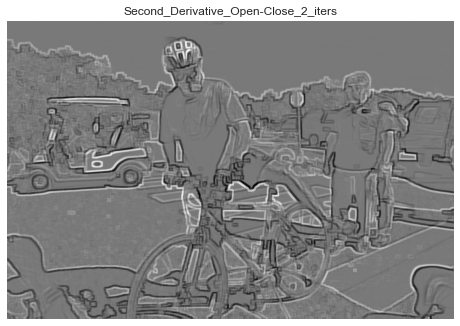

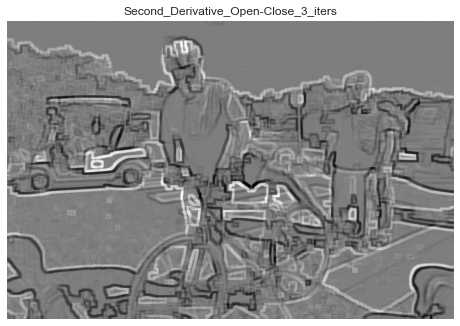

In [42]:
def second_derivative_3(img,KERNEL_SIZE=5, ITERS=1, METHOD_NAME=""):
    img_dilate = cv2.morphologyEx(img, cv2.MORPH_DILATE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_erode = cv2.morphologyEx(img, cv2.MORPH_ERODE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    
    img_second_derivative = (img_close + img_open - img_dilate - img_erode) * 0.5

    disp(img_second_derivative, f"{METHOD_NAME}_{ITERS}_iters")
    cv2.imwrite(f'outputs/P2/image_b_{METHOD_NAME}_{ITERS}_iters.png', img_second_derivative)

second_derivative_3(img_a, KERNEL_SIZE=5, ITERS=1, METHOD_NAME='Second_Derivative_Open-Close')
second_derivative_3(img_a, KERNEL_SIZE=5, ITERS=2, METHOD_NAME='Second_Derivative_Open-Close')
second_derivative_3(img_a, KERNEL_SIZE=5, ITERS=3, METHOD_NAME='Second_Derivative_Open-Close')

## D) Gradient - Dilation/Erosion

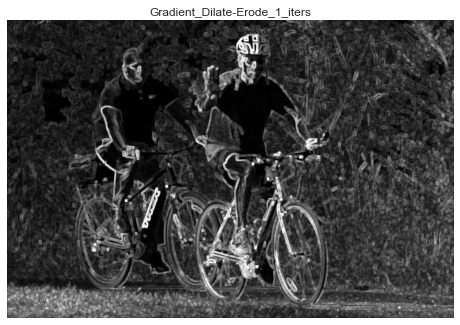

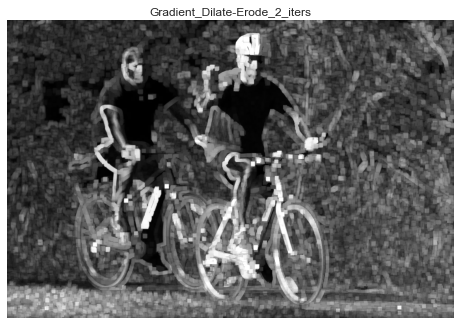

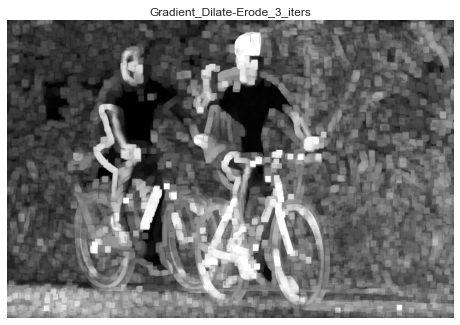

In [24]:
def gradient_1(img,KERNEL_SIZE=5, ITERS=1, METHOD_NAME=""):
    img_dilate = cv2.morphologyEx(img, cv2.MORPH_DILATE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_erode = cv2.morphologyEx(img, cv2.MORPH_ERODE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    
    img_gradient = img_dilate - img_erode

    disp(img_gradient, f"{METHOD_NAME}_{ITERS}_iters")
    cv2.imwrite(f'outputs/P2/image_b_{METHOD_NAME}_{ITERS}_iters.png', img_gradient)

gradient_1(img_b, KERNEL_SIZE=5, ITERS=1, METHOD_NAME='Gradient_Dilate-Erode')
gradient_1(img_b, KERNEL_SIZE=5, ITERS=2, METHOD_NAME='Gradient_Dilate-Erode')
gradient_1(img_b, KERNEL_SIZE=5, ITERS=3, METHOD_NAME='Gradient_Dilate-Erode')

## E) Gradient - Opening/Closing

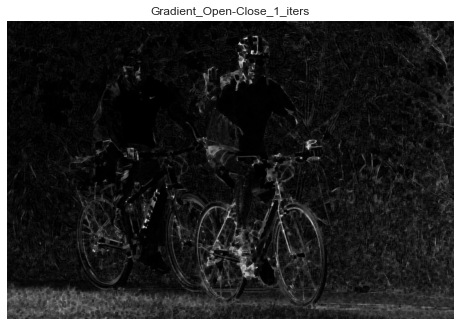

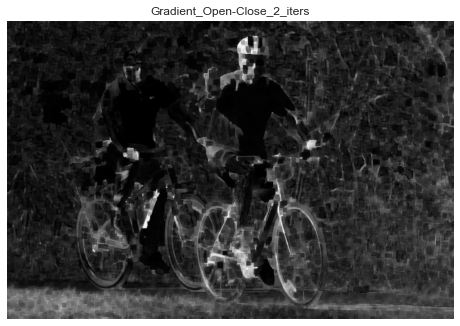

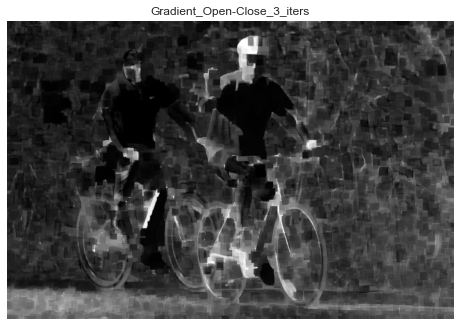

In [25]:
def gradient_2(img,KERNEL_SIZE=5, ITERS=1, METHOD_NAME=""):
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    
    img_gradient = img_close - img_open

    disp(img_gradient, f"{METHOD_NAME}_{ITERS}_iters")
    cv2.imwrite(f'outputs/P2/image_b_{METHOD_NAME}_{ITERS}_iters.png', img_gradient)

gradient_2(img_b, KERNEL_SIZE=5, ITERS=1, METHOD_NAME='Gradient_Open-Close')
gradient_2(img_b, KERNEL_SIZE=5, ITERS=2, METHOD_NAME='Gradient_Open-Close')
gradient_2(img_b, KERNEL_SIZE=5, ITERS=3, METHOD_NAME='Gradient_Open-Close')

## E) Gradient - ALL

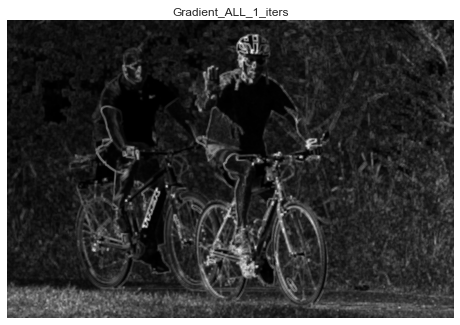

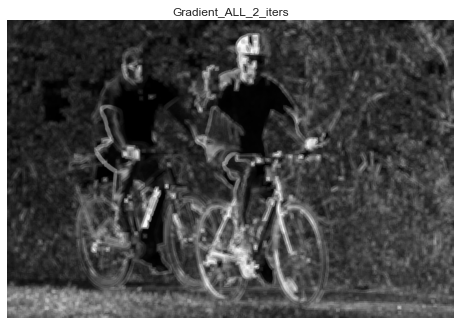

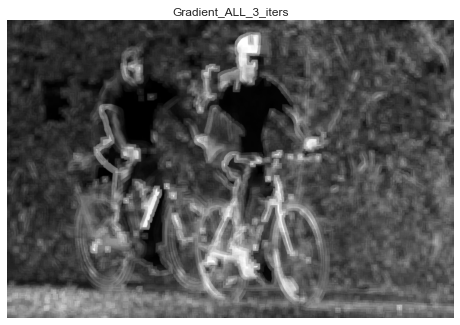

In [28]:
def gradient_3(img,KERNEL_SIZE=5, ITERS=1, METHOD_NAME=""):
    img_dilate = cv2.morphologyEx(img, cv2.MORPH_DILATE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_erode = cv2.morphologyEx(img, cv2.MORPH_ERODE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    
    img_gradient = (img_dilate-img_erode)+(img_close - img_open)

    disp(img_gradient, f"{METHOD_NAME}_{ITERS}_iters")
    cv2.imwrite(f'outputs/P2/image_b_{METHOD_NAME}_{ITERS}_iters.png', img_gradient)

gradient_3(img_b, KERNEL_SIZE=5, ITERS=1, METHOD_NAME='Gradient_ALL')
gradient_3(img_b, KERNEL_SIZE=5, ITERS=2, METHOD_NAME='Gradient_ALL')
gradient_3(img_b, KERNEL_SIZE=5, ITERS=3, METHOD_NAME='Gradient_ALL')

## F) Smoothing - Dilation/Erosion

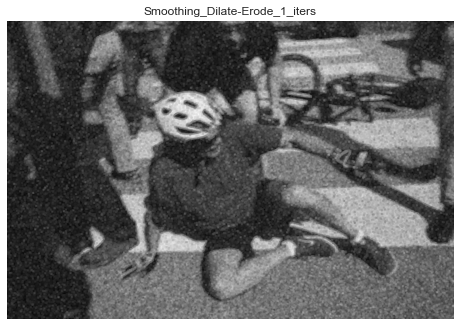

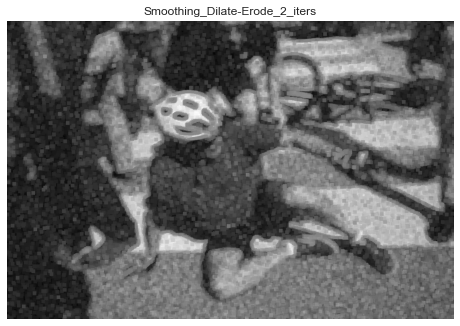

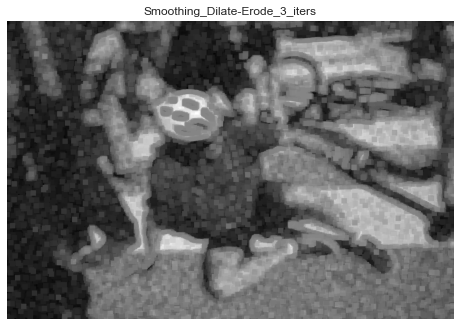

In [34]:
def smoothing_1(img,KERNEL_SIZE=5, ITERS=1, METHOD_NAME=""):
    img_dilate = cv2.morphologyEx(img, cv2.MORPH_DILATE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_erode = cv2.morphologyEx(img, cv2.MORPH_ERODE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    
    img_smooth = (img_dilate + img_erode) * 0.5

    disp(img_smooth, f"{METHOD_NAME}_{ITERS}_iters")
    cv2.imwrite(f'outputs/P2/image_b_{METHOD_NAME}_{ITERS}_iters.png', img_smooth)

smoothing_1(img_c, KERNEL_SIZE=5, ITERS=1, METHOD_NAME='Smoothing_Dilate-Erode')
smoothing_1(img_c, KERNEL_SIZE=5, ITERS=2, METHOD_NAME='Smoothing_Dilate-Erode')
smoothing_1(img_c, KERNEL_SIZE=5, ITERS=3, METHOD_NAME='Smoothing_Dilate-Erode')

## G) Smoothing - Opening/Closing

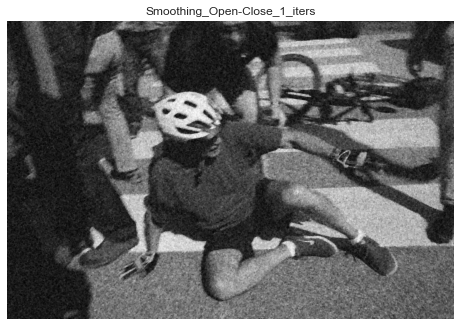

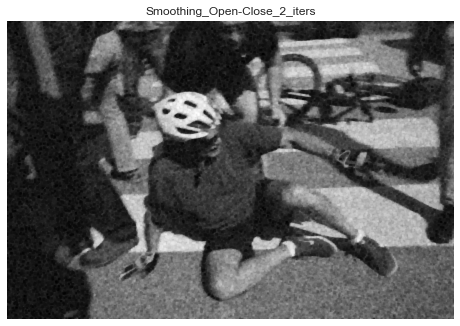

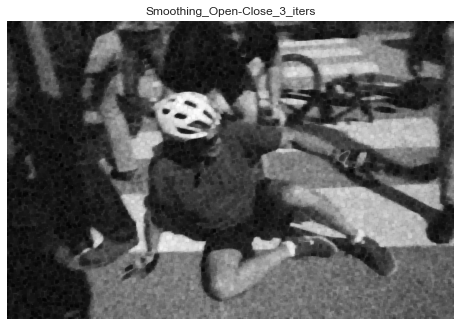

In [40]:
def smoothing_2(img,KERNEL_SIZE=5, ITERS=1, METHOD_NAME=""):
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32), iterations=ITERS)
    
    img_smooth = (img_close + img_open) * 0.5

    disp(img_smooth, f"{METHOD_NAME}_{ITERS}_iters")
    cv2.imwrite(f'outputs/P2/image_b_{METHOD_NAME}_{ITERS}_iters.png', img_smooth)

smoothing_2(img_c, KERNEL_SIZE=3, ITERS=1, METHOD_NAME='Smoothing_Open-Close')
smoothing_2(img_c, KERNEL_SIZE=3, ITERS=2, METHOD_NAME='Smoothing_Open-Close')
smoothing_2(img_c, KERNEL_SIZE=3, ITERS=3, METHOD_NAME='Smoothing_Open-Close')